# Import numero 1
Importo i dati già preprocessati nel file "TextImport.py".


NB: Le variabili e le funzioni presenti in TextImport e in generale nei file.py che importo possono essere presi dopo aver scritto TextImport."....."

In [1]:
import TextImport

  0%|          | 0/10213 [00:00<?, ?it/s]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\enduser\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
#TextImport.df

In [5]:
%whos

Variable     Type      Data/Info
--------------------------------
TextImport   module    <module 'TextImport' from<...>DiCodice\\TextImport.py'>


In [6]:
TextImport.DIR

'E3C-Corpus/data_collection/Italian/layer3'

# Import numero 2
Importo i vettori relative a tutte le parole trovati con il modello Skip Gram, vector size = 10, window = 10.

NB: il modello è stato allenato nel notebook "Provaword2vecTEXTPREPROCESSING"

In [13]:
import pickle

In [14]:
with open("my_vecs_preProcessing.p", "rb") as file:
    word2Vec_model = pickle.load(file)

# Analisi del modello ottenuto

In [15]:
#word2Vec_model.save('my_vecs.p')
print(word2Vec_model.wv.most_similar('cancro'))

[('mammella', 0.9806042909622192), ('tumore', 0.9751520752906799), ('inoperabile', 0.9696362614631653), ('castration', 0.9689900279045105), ('iperespressione', 0.9682956337928772), ('attivanti', 0.9661564826965332), ('maligno', 0.964479923248291), ('prostate', 0.964062511920929), ('refrattario', 0.9617848992347717), ('metastatic', 0.961518406867981)]


In [16]:
print(word2Vec_model.wv.similarity('occhiali', 'sci'))

0.6121774


In [18]:
import matplotlib.pyplot as plt
#from sklearn.decomposition import PCA non uso ora pca perchè ho dimensionalità gia uguale a due

#my_model = gensim.models.Word2Vec.load('my_vecs.p') non mi serve caricarlo

word_names = word2Vec_model.wv.index_to_key
word_vectors = [word2Vec_model.wv[word] for word in word_names]

#pca = PCA(n_components=2)

#my_pca = pca.fit_transform(my_model[model_vocab])
#vettori = word2Vec_model[model_vocab]
print(len(word_names))
print(len(TextImport.setVocabolarioFiltrato))

51336
51288


Volevo controllare che il numero di parole uniche nel vocabolario filtrato fosse uguale al numero di vettori del modello ma non è troppo così...

In [19]:
#word_vectors # tutte le parole con l'embedding numerico 2d.

In [20]:
import numpy as np
from sklearn.manifold import TSNE


In [21]:
word_vectors = np.array(word_vectors) # necessario siano np array per fare tsne
word_vectors

array([[ 0.21409039,  0.48644695, -0.26672772, ...,  0.47949988,
        -0.569847  ,  0.48316607],
       [ 0.22543131,  0.42107445,  0.06321989, ...,  0.7600017 ,
        -0.84323823,  0.46138453],
       [ 0.68649924,  0.20980488,  0.24054927, ...,  0.41529322,
        -0.7496267 ,  0.4277342 ],
       ...,
       [-0.00640347, -0.09226427, -0.22594152, ...,  0.15441018,
        -0.5459752 , -0.15516128],
       [ 0.03754907, -0.24258053, -0.30303997, ...,  0.0482116 ,
        -0.58044624, -0.15674837],
       [-0.38468236,  0.0661277 , -0.8411069 , ...,  0.26960889,
        -0.48185766, -0.03006232]], dtype=float32)

In [22]:
tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
coordinates = tsne_model.fit_transform(word_vectors)

C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


ci ha messo quasi 10 min a fare tsne del modello con parole di dim = 5

Jupyter notebook ci ha messo meno di 3 min, per dim = 10, anche circa 3 min.

Vediamo se con PCA e non tsne si hanno risultati migliori:

In [114]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)

# Adatta il modello PCA ai dati
CoordinatesPCA = pca.fit_transform(word_vectors)

print("Varianza spiegata dalla prima componente principale:", pca.explained_variance_ratio_[0])
print("Varianza spiegata dalla seconda componente principale:", pca.explained_variance_ratio_[1])

Varianza spiegata dalla prima componente principale: 0.22257158
Varianza spiegata dalla seconda componente principale: 0.13005099


In [98]:
# per rendere leggibile il plot, printo solo le prime 100 parole di word names:
word_names_reduced = word_names[2100:2300]

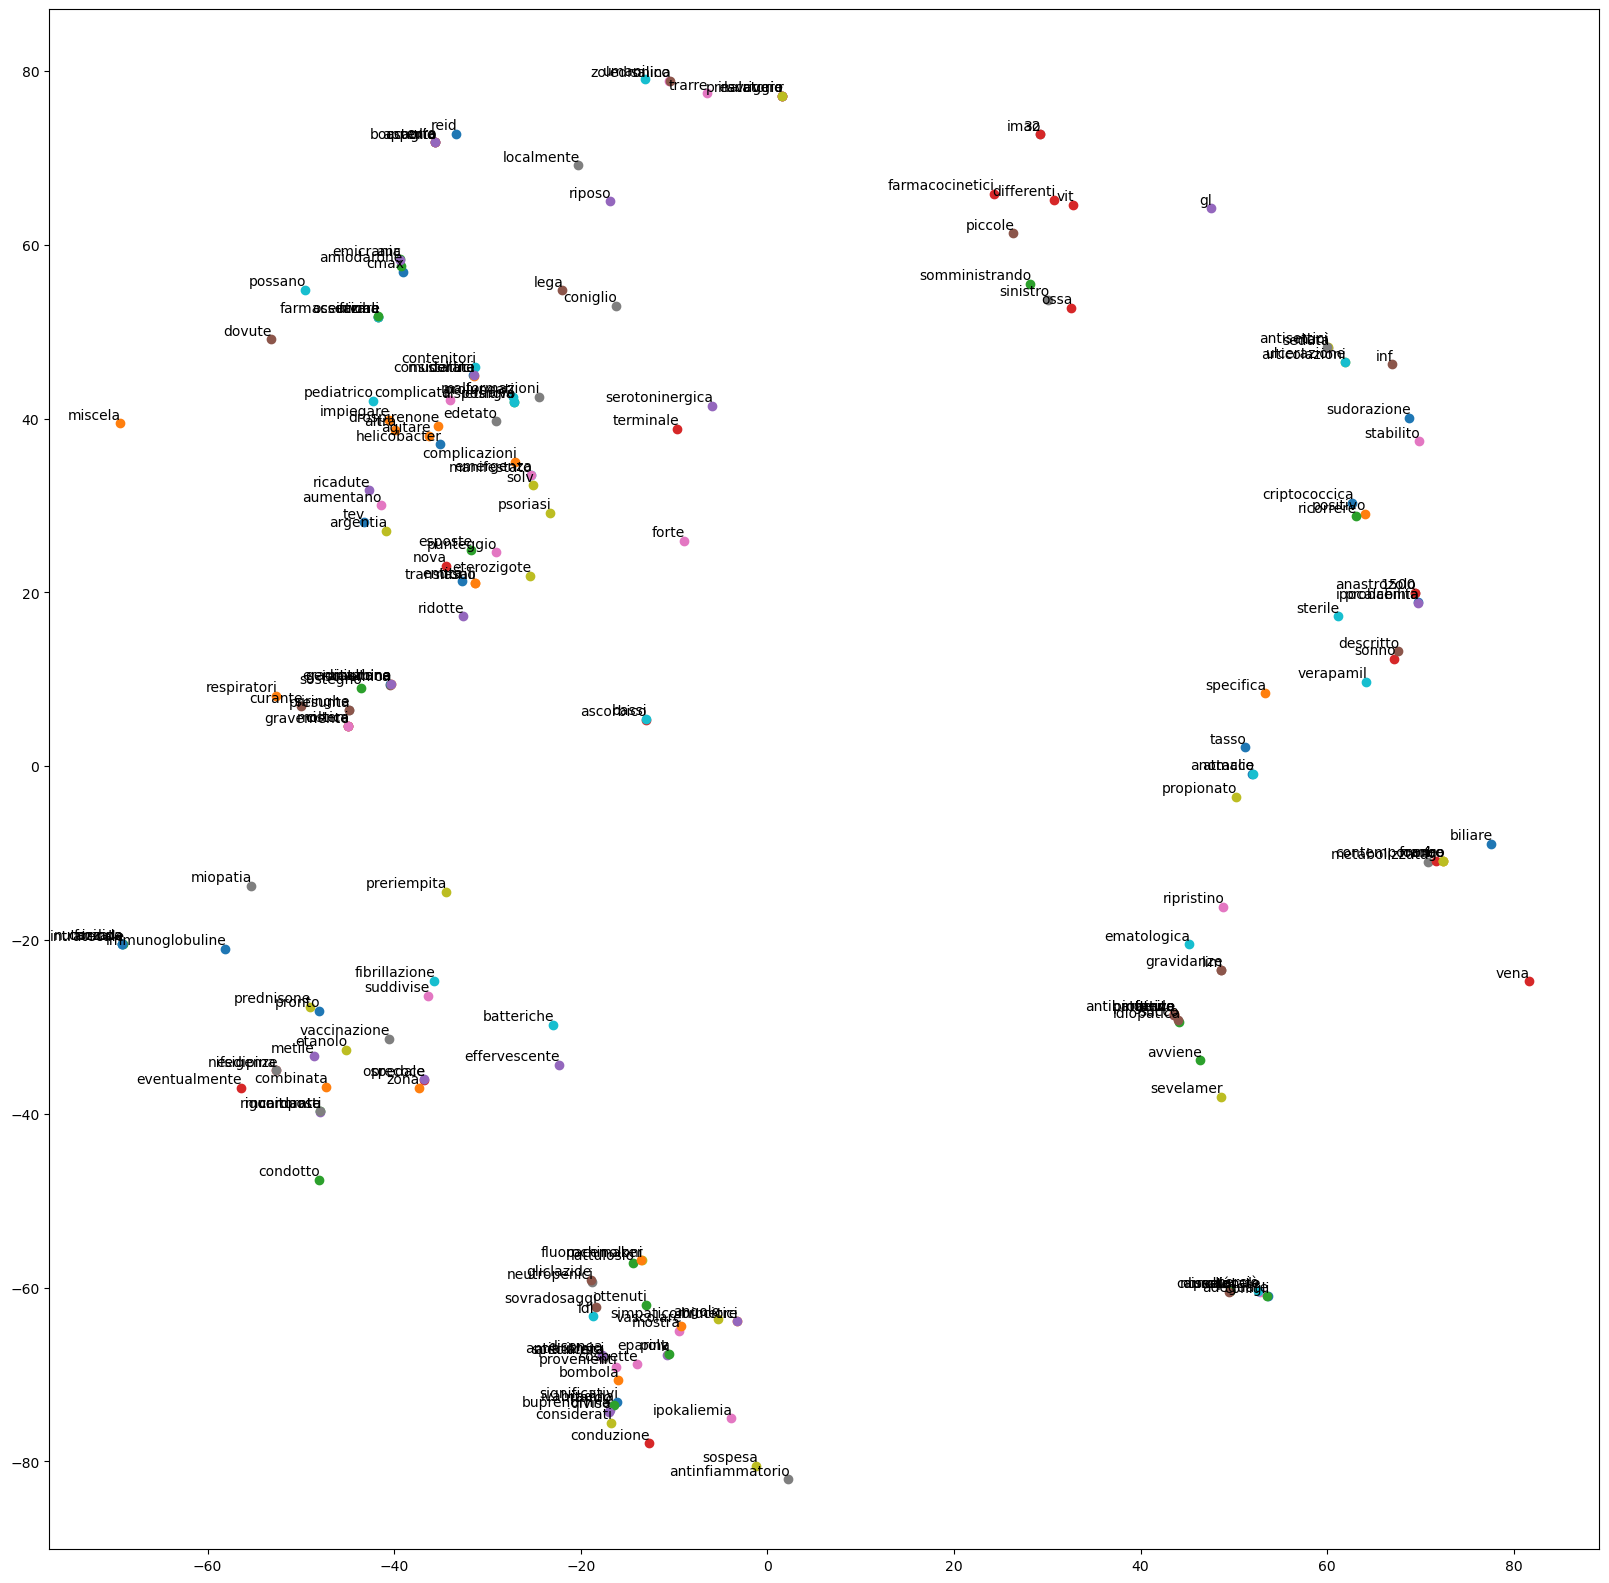

In [115]:
x = []
y = []
for i, word in enumerate(word_names_reduced):
    X,Y = coordinates[i]
    x.append(X)
    y.append(Y)

plt.figure(figsize=(20,20))
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(word_names_reduced[i],
                 xy=(x[i], y[i]),
                 xytext=(1, 1),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()

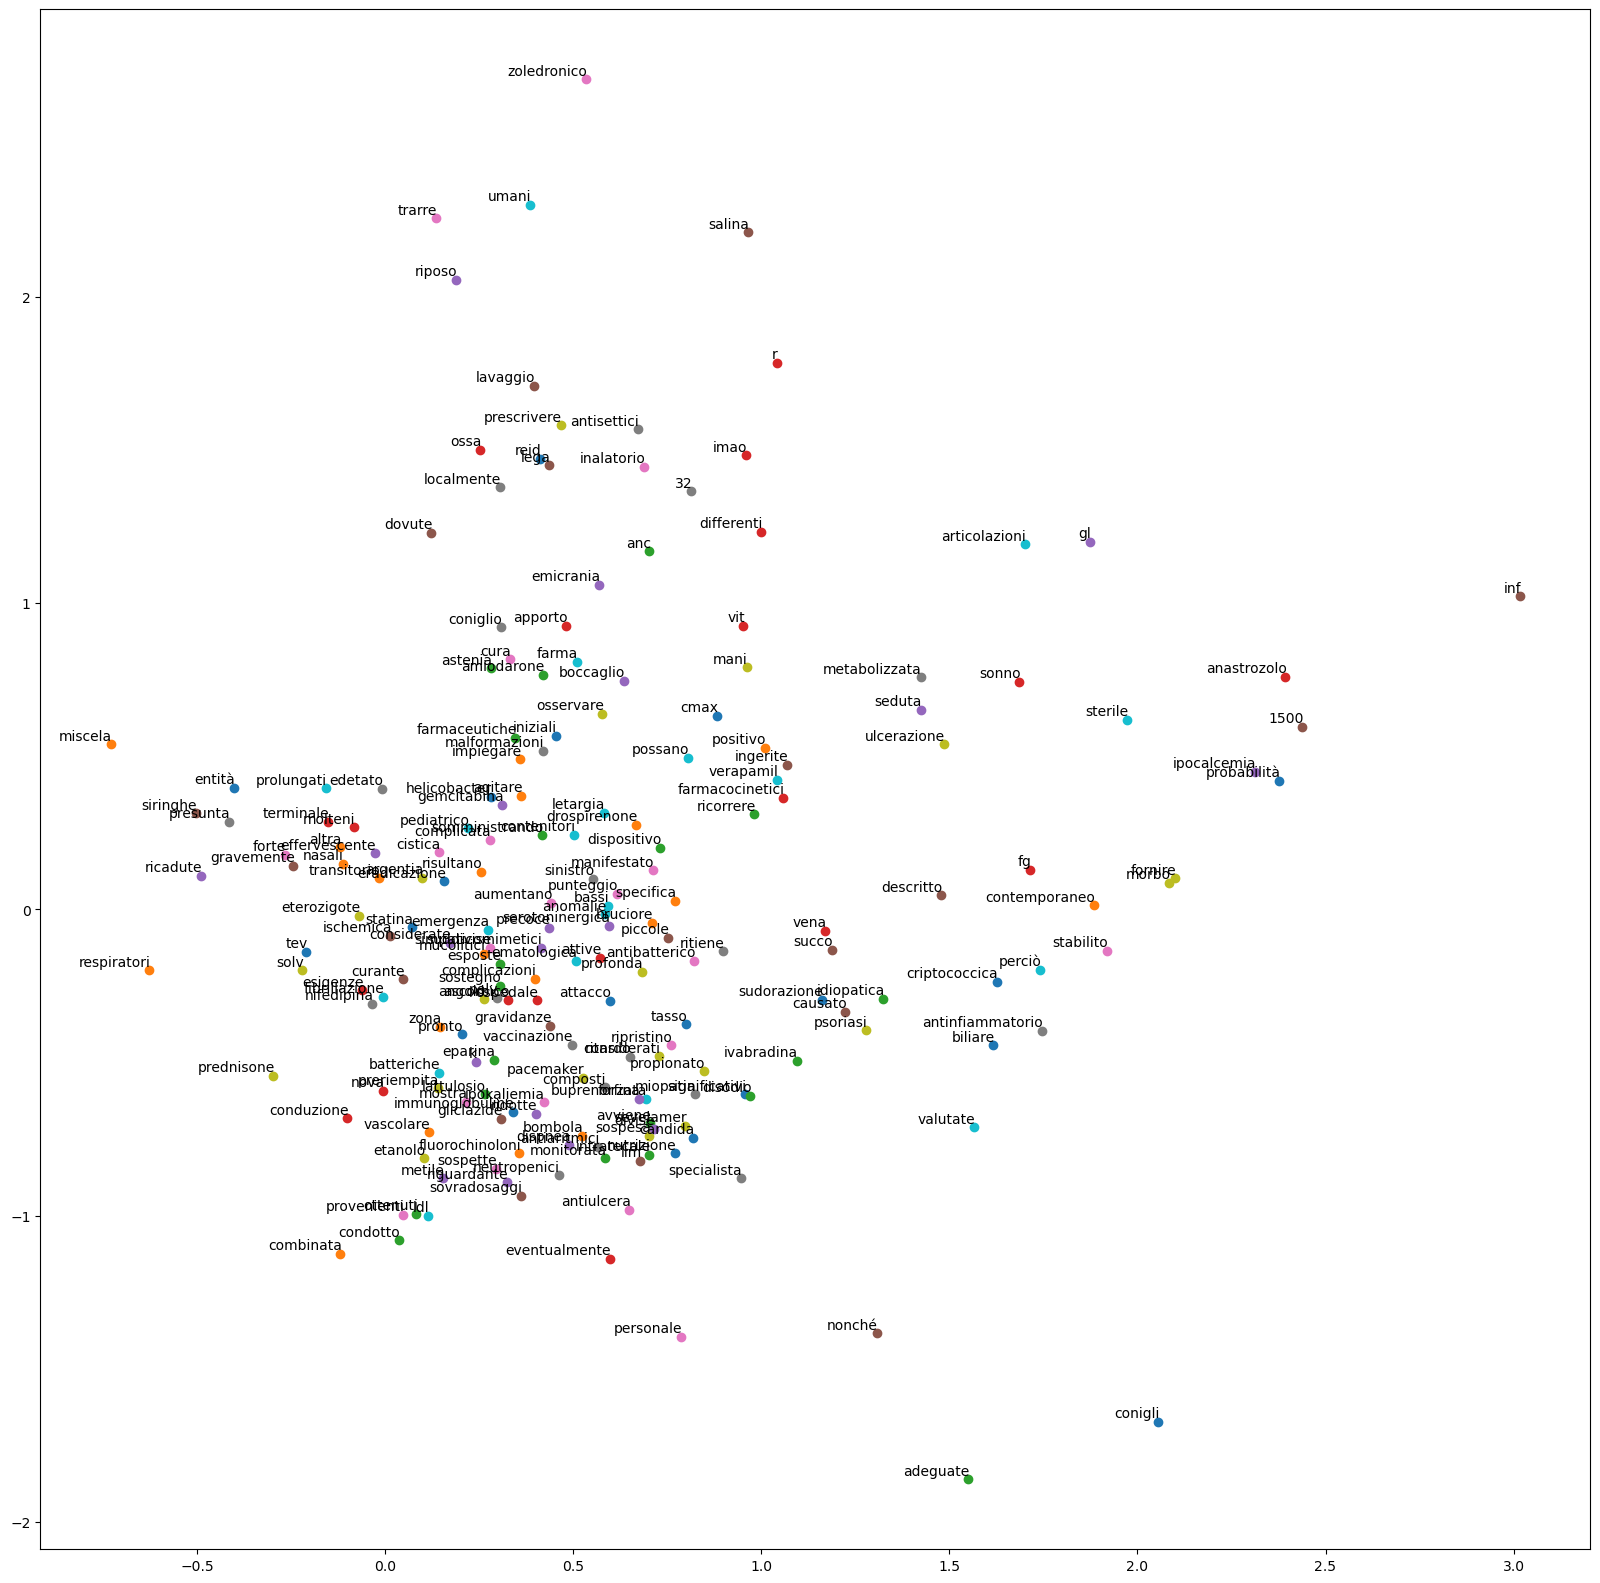

In [116]:
x = []
y = []
for i, word in enumerate(word_names_reduced):
    X,Y = CoordinatesPCA[i]
    x.append(X)
    y.append(Y)

plt.figure(figsize=(20,20))
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(word_names_reduced[i],
                 xy=(x[i], y[i]),
                 xytext=(1, 1),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()